# Project: TMDb Movie Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In the following report it will be analyzed data from the __tmbd movie dataset__. 
>The analysis is conducted through the lens of user ratings. Therefore, it aims to inquire and assess the effect that several variables could have on the average rating of movies. This is not intend to provide a definitive answer but rather to pave the way for more questions.
> Thereof, our dependent variable will be *vote_average*. As independent variables it'll be explored *revenue_adj, popularity, runtime, genres, year, release date and vote count*.

> The main question and its subsequents to be addressed are the following:
> **Which is the combination of attributes that make a great movie in terms of  user rating?**
    > - Which are the 10 all time highest rated movies?
    > - Are new movies higher rated than old ones?
    > - Are there significant differences across genres in terms of rating? How does the genre distribution, in terms of rating, vary across all genres? Do users agree more on certain genres?
    > - Is the general public more inclined toward short or long movies?
    > - What is the correlation between revenue and user rating? Is there a difference between general public critique and financial success of movies?

In [1]:
# Let's import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Let's dive in. I'll perform several operations to clean the data and end up with a better looking dataframe. Unuseful columns will be dropped, data will be trimmed and other operations will be performed to clean up the dataset. 
> Each step and decision will be thoroughly explained.

### General Properties

In [2]:
# Import and load TMBd dataset
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


 > First, let's take a look on general information regarding our dataframe. I personally like the .info() function for its simplicity of use and the amount of information packed into it. describe() will also be coded in to show some general stats. 

In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> That screenshot of the dataframe should be enough to spot several issues that need to be addressed. The following list of potential issues is based on both the above .info() and .describe() lines and the glimpse to the dataframe shown before. This list is meant to be purely descriptive. In the next paragraph it'll be described the list of actions to be taken with a more subjective character.
    >- Data is missing in multiple columns.
    >- *release_date* type is object instead of datatime
    >- Several columns (*cast, genres, production_companies*)  have characters that should be cleaned up.
    > - Movies span from 1960 all the way up to 2015.
    > - Most movies revenue and budget is zero or very small.
    > - Probably multiple outliers in runtime. Min = 0 and Max = 900 (quite an odyssey).

> Given the above overlook, several decisions will be taken. Such decisions will, to some extent, conditioned the future path for the study.
    > - There are multiple columns that will be dropped since they will not provide useful information and/or will not be the focus here. Such columns are: id, imdb_id, homepage, tagline, keywords, overview.
    > - For the sake of simplicity, *cast*, *director*, and *production_companies* will also be dropped. Be aware that this is a purely subjective and personal decision. Since the study will be mostly quantitive-based, and those are two qualitative columns with multiple missing values, they will be dropped as well. With more data though, it'd be pretty interesting to factor in both the effect of cast and production companies, as well as director cache, into the public critique.
    > - Since relativity is everything to make sense of the world, let's use *budget_adj* and *revenue_adj* instead of *budget* and *revenue*. That way we will have a frame of reference, in terms of financial success, for all movies no matter the release year.
    > - In line with the previous point, it would be misleading to compare using the values saved under vote_average when the number of users (vote_count) differs quite a lot from movie to movie. Therefore, a bayesian model will be used to compute the expected average. This point will be addressed when answering the first question, even though it could be added as a step in the cleaning process.
    > - For the revenue_adj column take a look at the last question where both original data and filtered data are used to compare with user rating.
    > - Categorize each movie genre based on a list of main genres. Each movie will be labeled with the first genre listed on that column that appears on the list of main genres. Those genres were taken from a [list in tmbd](https://www.themoviedb.org/talk/51b5fe1a760ee359996a0e62). As a note for consideration, I personally think that list does not consider what a genre actually is (I might be being a purist here) but I'll stick to it.
    
> Let's prep up the data!


### Data Cleaning

In [31]:
# First off, I'll make a copy of the original dataframe.
df_movies_c = df_movies.copy()

#### 1) Dropping columns

In [32]:
# Let's filter out the undesired columns
df_movies_c.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'production_companies', 'cast', 'director'], axis=1, inplace= True)

#### 2) Changing types

In [33]:
# Change release_date to datatime type
df_movies_c['release_date']=pd.to_datetime(df_movies_c['release_date'])

#### 3) Structuring genre column

In [34]:
# We'll jump into the genre column. 
# I'll start the cleaning process by taking a look at which movies are missing genre definition.
null =pd.DataFrame(df_movies_c['genres'].isnull())
index_null = null[null['genres'] == True].index
df_movies_c.loc[index_null, 'original_title']

424                                         Belli di papÃ 
620                                     All Hallows' Eve 2
997                   Star Wars Rebels: Spark of Rebellion
1712                                     Prayers for Bobby
1897                Jonas Brothers: The Concert Experience
2370                                       Freshman Father
2376                         Doctor Who: A Christmas Carol
2853                                             Vizontele
3279                                         ì•„ê¸°ì™€ ë‚˜
4547     London 2012 Olympic Opening Ceremony: Isles of...
4732                                         The Scapegoat
4797                               Doctor Who: The Snowmen
4890                            Cousin Ben Troop Screening
5830                    Doctor Who: The Time of the Doctor
5934                                          Prada: Candy
6043                                        Bombay Talkies
6530                                           Saw Rebir

In [35]:
# Since the number of missing values is small, I'll define a list with the MAIN genre 
# (take a look to main genre list in next line) for each movie and proceed to fill it in.
missing_genres = pd.Series(['Comedy', 'Horror','Adventure','Drama','Documentary','Drama','Science Fiction',
                           'Comedy','Comedy','Documentary','Drama','Science Fiction','Comedy','Science Fiction',
                           'Romance','Drama','Horror','Comedy','Science Fiction','Comedy','Adventure',
                            'Comedy','Comedy'], index = index_null)
df_movies_c['genres'].fillna(missing_genres, inplace=True)
df_movies_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10866 non-null  float64       
 1   budget          10866 non-null  int64         
 2   revenue         10866 non-null  int64         
 3   original_title  10866 non-null  object        
 4   runtime         10866 non-null  int64         
 5   genres          10866 non-null  object        
 6   release_date    10866 non-null  datetime64[ns]
 7   vote_count      10866 non-null  int64         
 8   vote_average    10866 non-null  float64       
 9   release_year    10866 non-null  int64         
 10  budget_adj      10866 non-null  float64       
 11  revenue_adj     10866 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(2)
memory usage: 1018.8+ KB


In [36]:
# Create new df with genre column.
df_genre = pd.DataFrame(df_movies_c['genres'])
# Each movie has multiple genres associated to it. Split by |
df_genre = df_genre.apply(lambda x: x.str.split('|'))
df_genre.head()

,genres
0,"[Action, Adventure, Science Fiction, Thriller]"
1,"[Action, Adventure, Science Fiction, Thriller]"
2,"[Adventure, Science Fiction, Thriller]"
3,"[Action, Adventure, Science Fiction, Fantasy]"
4,"[Action, Crime, Thriller]"


In [39]:
# Select main_genre for each movie based on main_genres list taken from Tmdb.
list_genres = ['Action','Adventure', 'Comedy', 'Crime', 'Drama', 'War', 'Western', 'Romance',
               'Science Fiction', 'Fantasy', 'Horror', 'Documentary', 'Thriller', 'Mystery', 'Family',
               'TV Movie', 'Music', 'Animation', 'Foreign', 'History']
def select_genre(genres):
    for i in range (0, len(genres)):
        if genres[i] in list_genres:
            return genres[i]

df_movies_c['main_genres'] = df_genre['genres'].apply(select_genre) # apply function that selects main genre for each movie 
#and creates new column
df_movies_c.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genres
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


<a id='eda'></a>
## Exploratory Data Analysis

> I'll start off the data exploration stage by taking a general look at how the different variables are distributed and the amount of outliers for each one of them. For doing so, I'll standardized the variables and use a boxplot.

> Then, I'll use a heatmap to further explore correlations between variables and select those which we'll be used to answer the formulated questions.

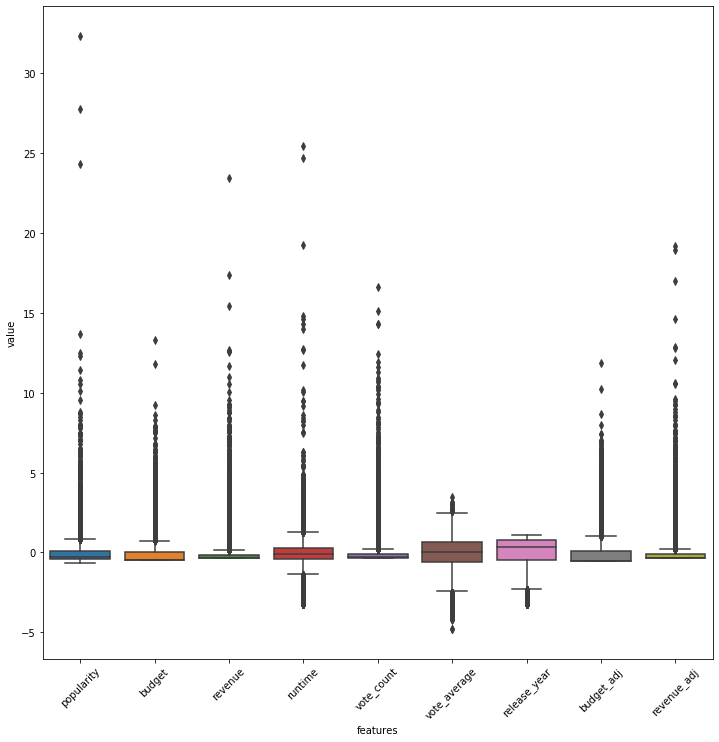

In [41]:
# Box Plot
# Filter out non-quantative fields.
list = ['original_title', 'genres', 'main_genres', 'release_date']
df_movies_filter = df_movies_c.drop(list, axis=1)
# Change data types to int
df_movies_filter.astype(int)
# Standardized values and prepare dataframe using .melt() for plotting.
df_movies_std = (df_movies_filter - df_movies_filter.mean())/(df_movies_filter.std())
df_movies_std = pd.melt(df_movies_std, var_name="features", value_name="value")
# Input features and values and plot.
plt.figure(figsize=(12, 12))
sns.boxplot(x="features", y="value", data=df_movies_std)
plt.xticks(rotation=45);


> Several points can be derived from the boxplot:
    > - As I've mentioned in prior sections, budget and revenue fields are full of 0 and very small values which really lowers the quality of the data.
    > - Both popularity and vote_count have very similar distributions. I'll show using a heatmap how strong the correlation between these two features actually stand. The data is spread out substantially, with both features showing very high values with respect to the median (lots of outliers).
    > - Runtime distribution also showcases the presence of multiple outliers.

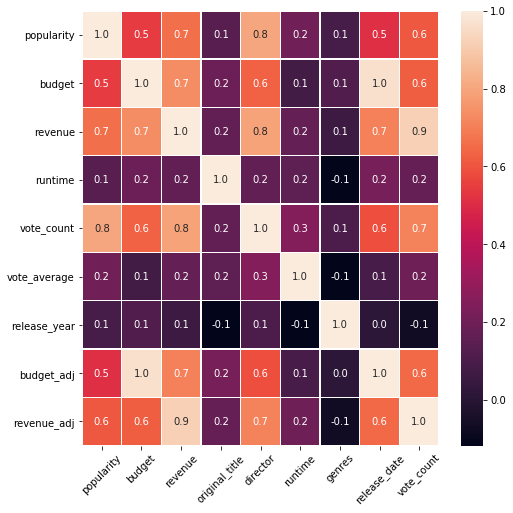

In [13]:
# Heatmap
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df_movies_c.corr(), annot= True, linewidths=.5, fmt='.1f', ax=ax)
ax.set_xticklabels(df_movies_c, rotation=45);

> The heatmap displayed above further reinforces the idea of how strongly correlated some features are. 
    > - Revenue, budget, revenue_adj and budget_adj are strongly correlated as we expected.
    > - Popularity and vote_count are also strongly correlated (0.8). 
    > - No other correaltions are considered sufficiently significant for feature extraction and selection.

> Therefore, after this initial exploratory overview, the features to be used in the following analysis are: *runtime, vote_count, vote_average, release_year, year, budget_adj, revenue_adj, main_genres*.

 #### 1) 10 all time highest rated movies.

> As we've checked in the prior boxplot there is a huge dispersion with regards to vote_count. This directly impacts the veracity of the vote_average since movies with very low number of votes could have extremely high or low ratings. Therefore, we won't get a reliable list for the 10 all time best movies by user rating right away.
> In order to smooth out the averages, I'll use a simplify bayesian average model. Thus a new column for the expected averages will be created. The calculation is ruled by the following formula:

![alt text](https://miro.medium.com/max/404/0*-pNvIVPyRbuB4p7m.png)


> First, I'll plot a distribution of ratings vs number of votes and from there I'll choose parameters C and m. Then, I'll apply  the model to each movie and compute the weighted averages. 

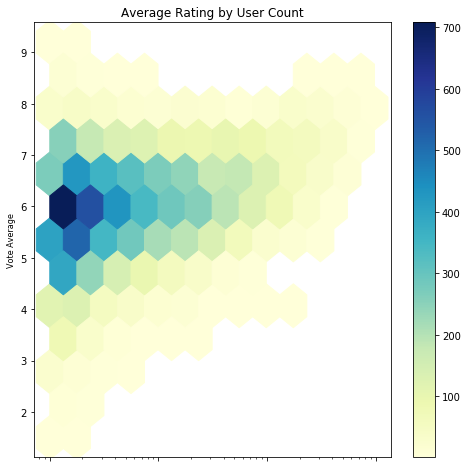

In [14]:
# Grid plot to visually compare vote averages and vote count.
grid = pd.DataFrame({'Vote Count': df_movies_c['vote_count'], 'Vote Average': df_movies_c['vote_average']})
grid.plot(x ='Vote Count', y='Vote Average', kind='hexbin', cmap ='YlGnBu', xscale ='log', gridsize=12, mincnt=1, figsize=(8, 8), title= 'Average Rating by User Count')
plt.xlabel ('Vote Count', fontsize=8)
plt.ylabel('Vote Average', fontsize =8)
plt.show();

> As it was mentioned, movies which have low number of votes tend to be more volatile, spaning from 1 all the way up to a 9+ average rating. 
> On the other side, as we move upward in terms of vote count, the average seem to hover around 6 where there is a big cluster. Surprisingly the average remains quite constante. Based on the graph, I'll eyeball the two parameter to input in the bayesian model. Let's consider ***C* equal to 50 and *m* equal to 6**. 

In [16]:
# Prior to computing the bayesian averages and showing the final list, I'll go ahead and display a list 
# with the 10 best rated movies as shown in the dataset.
df_movies_c.sort_values(['vote_average'], ascending = False, inplace = True)
df_movies_c.loc[:, ['original_title', 'vote_average']].head(10)

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2
538,The Mask You Live In,8.9
2269,Life Cycles,8.8
1200,Black Mirror: White Christmas,8.8
6911,Pink Floyd: Pulse,8.7
2401,Opeth: In Live Concert At The Royal Albert Hall,8.6
3690,The Art of Flight,8.5
8411,Queen - Rock Montreal,8.5
8221,A Personal Journey with Martin Scorsese Throug...,8.5
5830,Doctor Who: The Time of the Doctor,8.5


In [42]:
# Input both the constants and values for each movie and compute bayesian model.
C = 50 # input confidence prior
m = 6 # input average prior
# Create new column with the bayesian averages
df_movies_c['bayes_avg'] = (C*m + df_movies_c['vote_count']*df_movies_c['vote_average'])/(C + df_movies_c['vote_count'])
df_movies_c.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genres,bayes_avg
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,6.495545
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,7.091179
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,6.294071
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,7.485960
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,7.278312


In [43]:
# Sort by bayes_avg in descending order and show 10 all time highest rated movies.
df_movies_c.sort_values(['bayes_avg'], ascending = False, inplace = True)
df_movies_c.loc[:, ['original_title', 'bayes_avg']].head(10)

,original_title,bayes_avg
4178,The Shawshank Redemption,8.379325
7269,The Godfather,8.271393
650,Whiplash,8.154583
2875,The Dark Knight,8.087621
2409,Fight Club,8.082421
4177,Pulp Fiction,8.080530
4179,Forrest Gump,8.078598
10222,Schindler's List,8.060850
9758,The Godfather: Part II,8.051857
629,Interstellar,7.984728


> It seems that the first list has been completely oblitarated after applying the bayesian averages. And, we shall all agree that justice has been restablished on this list (at least, as far as the general public opinion goes, even though I'm missing the Lord of the Rings here).

#### 2) Are new movies higher rated than old ones?
  

> The goal of this question is to explore if there is any bias in rating movies depending on its release_year. 
> First, I'll plot the release_year distribution spanning all years accounted in the dataset to get a sense of the amount of movies rated for each year.
> Then, I'll group the data by year and plot the average rating per year.

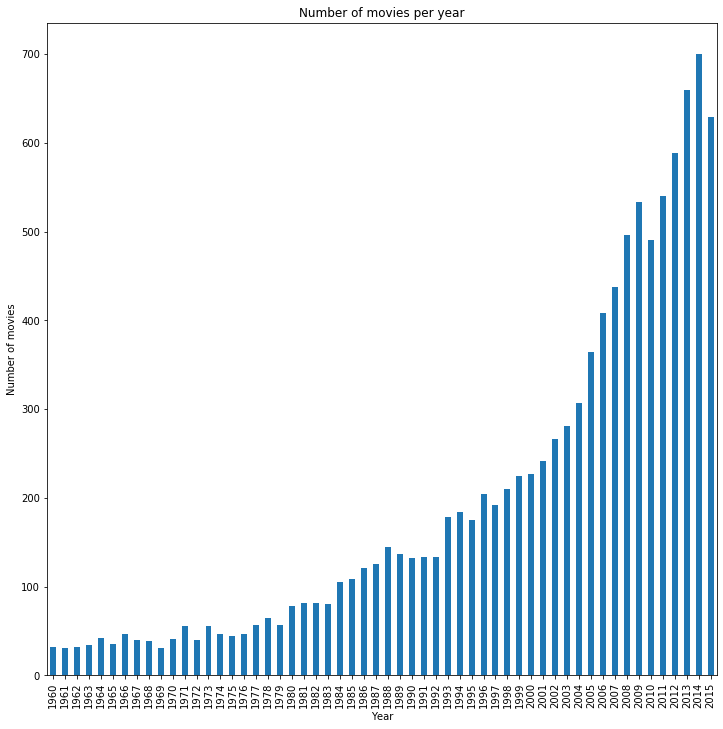

In [18]:
# Group by release year and then count rows for each resulting group. 
#The quantity of rows is the amount of movies per year in the dataset.
df_movies_c.groupby('release_year')['vote_count'].count().plot(kind='bar', figsize=(12, 12))
plt.xlabel('Year', fontsize =10)
plt.ylabel('Number of movies', fontsize =10)
plt.title('Number of movies per year')
plt.show();

> After exploring the distribution of movies across all years, it is quite clear that there is a vast difference between the amount of old movies and new movies in the dataset. Let's explore how this distribution replicates when using user rating instead of number of movies per year.

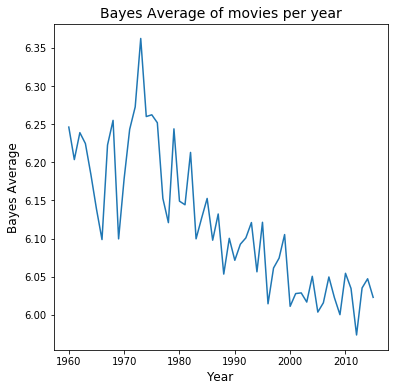

In [19]:
# Same as above but instead of counting rows, the mean for each group is calculated. 
# This time the function is applied on the bayes_avg column.
df_movies_c.groupby('release_year')['bayes_avg'].mean().plot(kind='line', figsize=(6, 6))
plt.xlabel('Year', fontsize =12)
plt.ylabel('Bayes Average', fontsize =12)
plt.title('Bayes Average of movies per year', fontsize =14)
plt.show();

> There is a slight downwards trend from the oldest to the newest movies.

##### 3) Are there significant differences across genres in terms of rating? How does the genre distribution, in terms of rating, vary across all genres ? Do users agree more on certain genres?

> First, I'll take a look at the distribution of genres in terms of the amount of movies produced for each of the main genres explained in previous sections. For that, a bar plot will be used again.

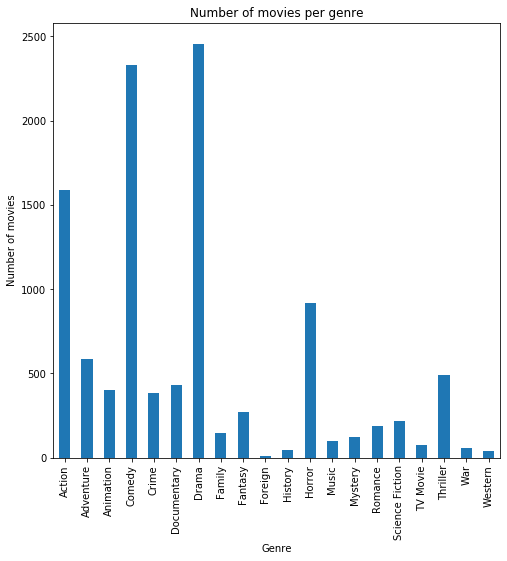

In [20]:
# Plot distribution of genres using a bar plot as shown in prior question.
df_movies_c.groupby('main_genres')['vote_count'].count().plot(kind='bar', figsize=(8, 8))
plt.xlabel('Genre', fontsize =10)
plt.ylabel('Number of movies', fontsize =10)
plt.title('Number of movies per genre')
plt.show();

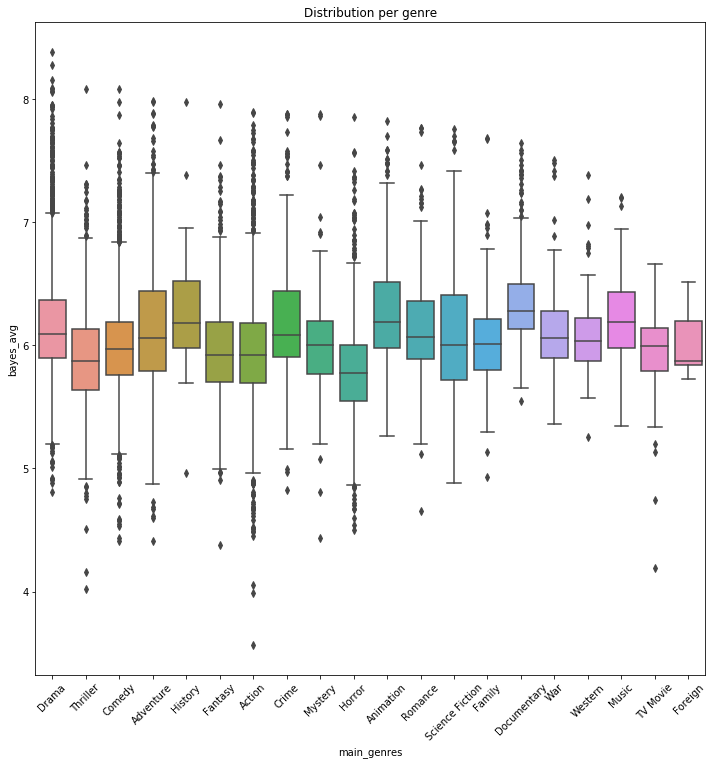

In [21]:
# Plot the distribution of each genre using a boxplot
plt.figure(figsize=(12, 12))
sns.boxplot(x="main_genres", y="bayes_avg", data=df_movies_c);
plt.title('Distribution per genre')
plt.xticks(rotation=45);

> Even though that's a pretty clustered plot, several observations could be derived.
> - In terms of average rating per genre, there are slight variations but no genre is clearly ahead. All hover around 6.0. Documentary, Animation and History seem to pull a bit ahead of the rest.
> - In terms of dispersion, Drama, Comedy and Action present very high and very poor rated movies. As shown in the first graph, these three genres have the highsest amount of movies. Speculatively speaking, if only we were not bombarded with them, maybe ratings could be more stable. 
>- We find the lowest number of outliers in genres like History and Foreign.

#### 4) Is the general public more inclined toward short or long movies?

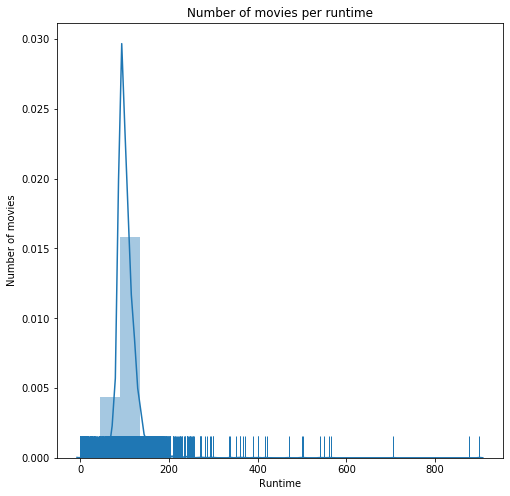

In [49]:
# Create df with runtime and bayes_avg
df_runtime = df_movies_c.loc[:, ['runtime', 'bayes_avg']]
# Plot distribution with outliers
plt.figure(figsize=(8, 8))
sns.distplot(df_runtime['runtime'], kde=True, rug=True, bins= 20)
plt.xlabel('Runtime', fontsize =10)
plt.ylabel('Number of movies', fontsize =10)
plt.title('Number of movies per runtime', fontsize = 12);

In [50]:
# Use boolean mask to filter out values lower than Q1-1.5IQR and higher than Q3 +1.5IQR
# Values of Q1 and Q3 taking from .describe() in previous section.
df_runtime['runtime'] = df_runtime[(df_runtime['runtime'] >= 90-1.5*(111-90)) & (df_runtime['runtime'] <= 111+1.5*(111-90))] 
df_runtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 4178 to 1696
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   runtime    10085 non-null  float64
 1   bayes_avg  10866 non-null  float64
dtypes: float64(2)
memory usage: 254.7 KB


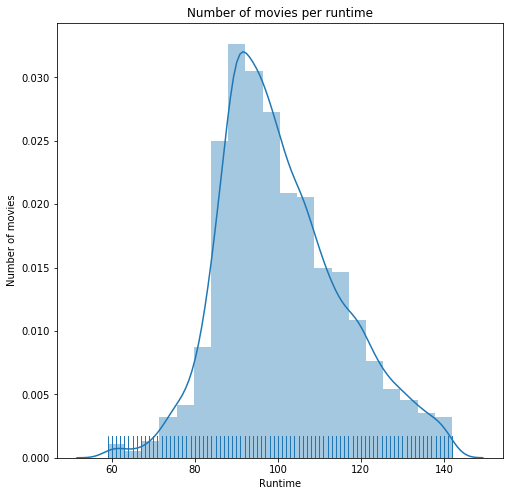

In [51]:
# Plot distribution without outliers
plt.figure(figsize=(8, 8))
sns.distplot(df_runtime['runtime'], kde=True, rug=True, bins= 20)
plt.xlabel('Runtime', fontsize =10)
plt.ylabel('Number of movies', fontsize =10)
plt.title('Number of movies per runtime', fontsize = 12);

> Filtering out the outliers, the runtime distribution adjust quite accurately to a normal distribution, which means lies around 100 min.

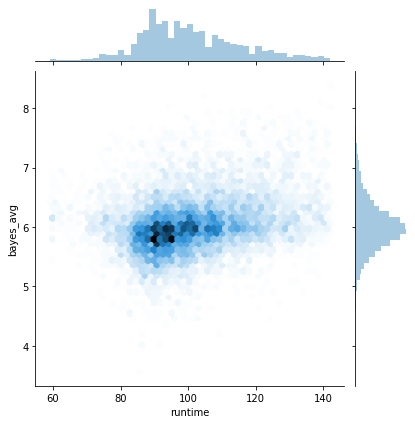

In [23]:
# Now, let's use a hexbin plot to visualize the correlation between the weighted average and runtime.
sns.jointplot(x='runtime', y='bayes_avg', data=df_runtime, kind="hex");

> There is no apparent correlation between both variables given than the density plot is essentially flat across the whole range.

#### 5) What is the correlation between revenue and user rating? Is there a difference between general public critique and financial success of movies?

> For the last question, I'll study how revenue and rating correlate. Since the dataset is plagued with very small values for revenue, two visualizations will be displayed. First visual using all values as provided and, a second one, filtering out values below .


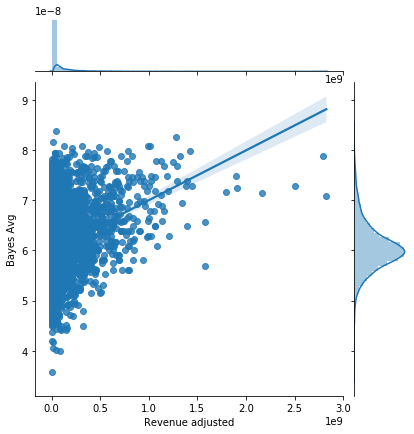

In [27]:
# Plot relation between revenue and average rating using a regression plot. All original values are included.
sns.jointplot(x="revenue_adj", y="bayes_avg", data=df_movies_c, kind="reg");
plt.xlabel('Revenue adjusted', fontsize =10)
plt.ylabel('Bayes Avg', fontsize =10);

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4292 entries, 4178 to 7526
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   revenue_adj  4292 non-null   float64
 1   bayes_avg    4292 non-null   float64
dtypes: float64(2)
memory usage: 100.6 KB


<Figure size 576x576 with 0 Axes>

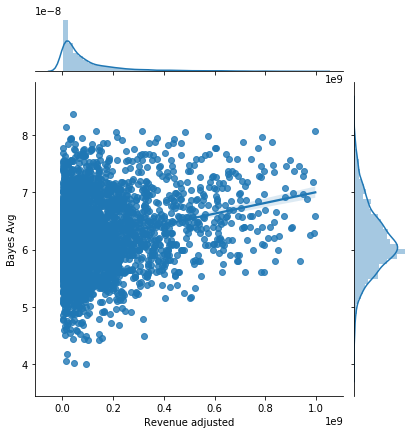

In [54]:
# Plot relation between revenue and average rating using a regression plot. Zeros are filtered out from dataset.
df_revenue = df_movies_c.loc[:, ['revenue_adj', 'bayes_avg']]
# Use boolean mask to filter out all values equal to 0
df_revenue = df_revenue[(df_revenue['revenue_adj'] > 1000000) & (df_revenue['revenue_adj'] < 1000000000)]
# Plot distribution without outliers
plt.figure(figsize=(8, 8))
sns.jointplot(x=df_revenue['revenue_adj'], y=df_revenue['bayes_avg'], data=df_revenue, kind="reg")
plt.xlabel('Revenue adjusted', fontsize =10)
plt.ylabel('Bayes Avg', fontsize =10);
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3838 entries, 4178 to 7526
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   revenue_adj  3838 non-null   float64
 1   bayes_avg    3838 non-null   float64
dtypes: float64(2)
memory usage: 90.0 KB


<Figure size 576x576 with 0 Axes>

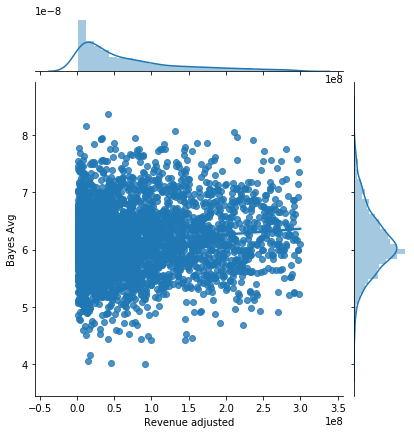

In [53]:
# Plot relation between revenue and average rating using a regression plot. Zeros are filtered out from dataset.
df_revenue = df_movies_c.loc[:, ['revenue_adj', 'bayes_avg']]
# Use boolean mask to filter out all values equal to 0
df_revenue = df_revenue[(df_revenue['revenue_adj'] > 1000000) & (df_revenue['revenue_adj'] < 300000000)]
# Plot distribution without outliers
plt.figure(figsize=(8, 8))
sns.jointplot(x=df_revenue['revenue_adj'], y=df_revenue['bayes_avg'], data=df_revenue, kind="reg")
plt.xlabel('Revenue adjusted', fontsize =10)
plt.ylabel('Bayes Avg', fontsize =10);
df_revenue.info()

> Some sort of criteria should be stablished to filter out very small values. For the sake of simplificity, I decided to randomly choose both the lower and upper limit. 
I've played around with the numbers in the boolean mask till I found an interval in which most movies are represented. 

> Movies below 1 million dollars are discarded (since below that mark we are probably getting into Sharknado territory).
> For the upper threshold, two values were chosen. 1 billion dollars, which includes most blockbusters and 300 million dollars.

> So, after filtering out very small values and very high revenues, the graph shows a slight upwards trends. However, it is also worth noting that variability is substantial through the whole spectrum.

<a id='conclusions'></a>
## Conclusions

> The whole analysis was conducted through the lens of user rating. I'll conclude the analysis briefly describing the main conclusions and proposing new questions that could further complete the analysis.
> - Since no statistical computations have been carried out, I'll stick to strictly describing the results from the visualizations. Firts, it was tackled the relation between release year and user rating. There is an increasing number of movies being release in latest years. However, it seems that the average rating has been slightly declining since 1960.
> - Then, I've jumped to analyze differences between genres. In terms of mean rating and stability (lower dispersion and number of outliers) **History** seems to come out victorious but not for much.
> - Runtime was also taken into account in the analysis. As shown in the hexbin plot, there is no clear correlation between average and runtime.
>- Finally, revenue adjusted and average were compared. Multiple values were filtered out from the revenue column. After applying the filter, two bivariate linear plots were displayed. When including all blockbusters (upper limit 1 billion dollars) there is a clear upwards trends, correlating revenue and average in a direct manner. However, since most movies lie below the 300 million dollar threshold, filtering out the blockbusters substantially reduces the slope. 

> To sum it all up, it can not be infer a definite answer to which combination of features make up the highest rated movies. Several other questions could be addressed to further complete the analysis, such as:
> - Which have been the highstest rated genres year over year? Can we relate the results from the second and third question?
> - Do certain periods of the year affect user rating? Hypothesis testing: Movies released in Christmas periods have higher ratings.
> - Factor in the cast and director cache. Are movies with more famous directors better rated?

### Bibliography

> 1- [TMbd genre list](https://www.themoviedb.org/talk/51b5fe1a760ee359996a0e62)

> 2- [Bayesian Average](https://en.wikipedia.org/wiki/Bayesian_average)

> 3- [Computing a Bayesian Estimate of Star Rating Means by Benjamin Bengfort](https://medium.com/district-data-labs/computing-a-bayesian-estimate-of-star-rating-means-651496a890ab)

> 4- [Seaborn tutorial](https://seaborn.pydata.org/tutorial/distributions.html#plotting-bivariate-distributions)

> 5- [Stack Exchange thread about sample size and means](https://stats.stackexchange.com/questions/31326/how-should-one-interpret-the-comparison-of-means-from-different-sample-sizes)